In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)

## Abalone (snail colonies) dataset

In [3]:
data = pd.read_csv('abalone.csv')

In [4]:
labels = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
data.columns = labels
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Male = 1, Female = 0, Infant = -1

In [4]:
arr = []
sex = data['Sex']
for attr in sex:
    s = -1.0
    if attr == 'M':
        s = 1.0
    elif attr == 'F':
        s = 0.0
    arr.append(s)
data['Sex'] = arr
X = data.iloc[:,:8]
Y = data.iloc[:,8]

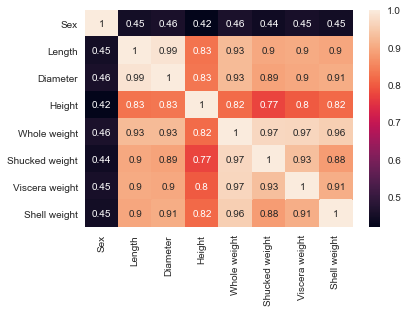

In [5]:
sns.heatmap(X.corr(), annot = True)

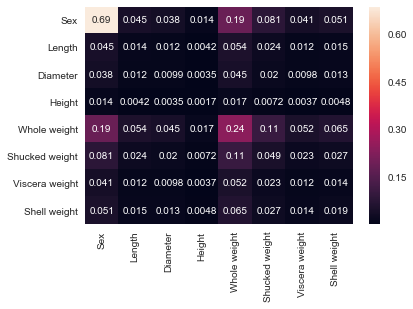

In [6]:
sns.heatmap(X.cov(), annot = True)

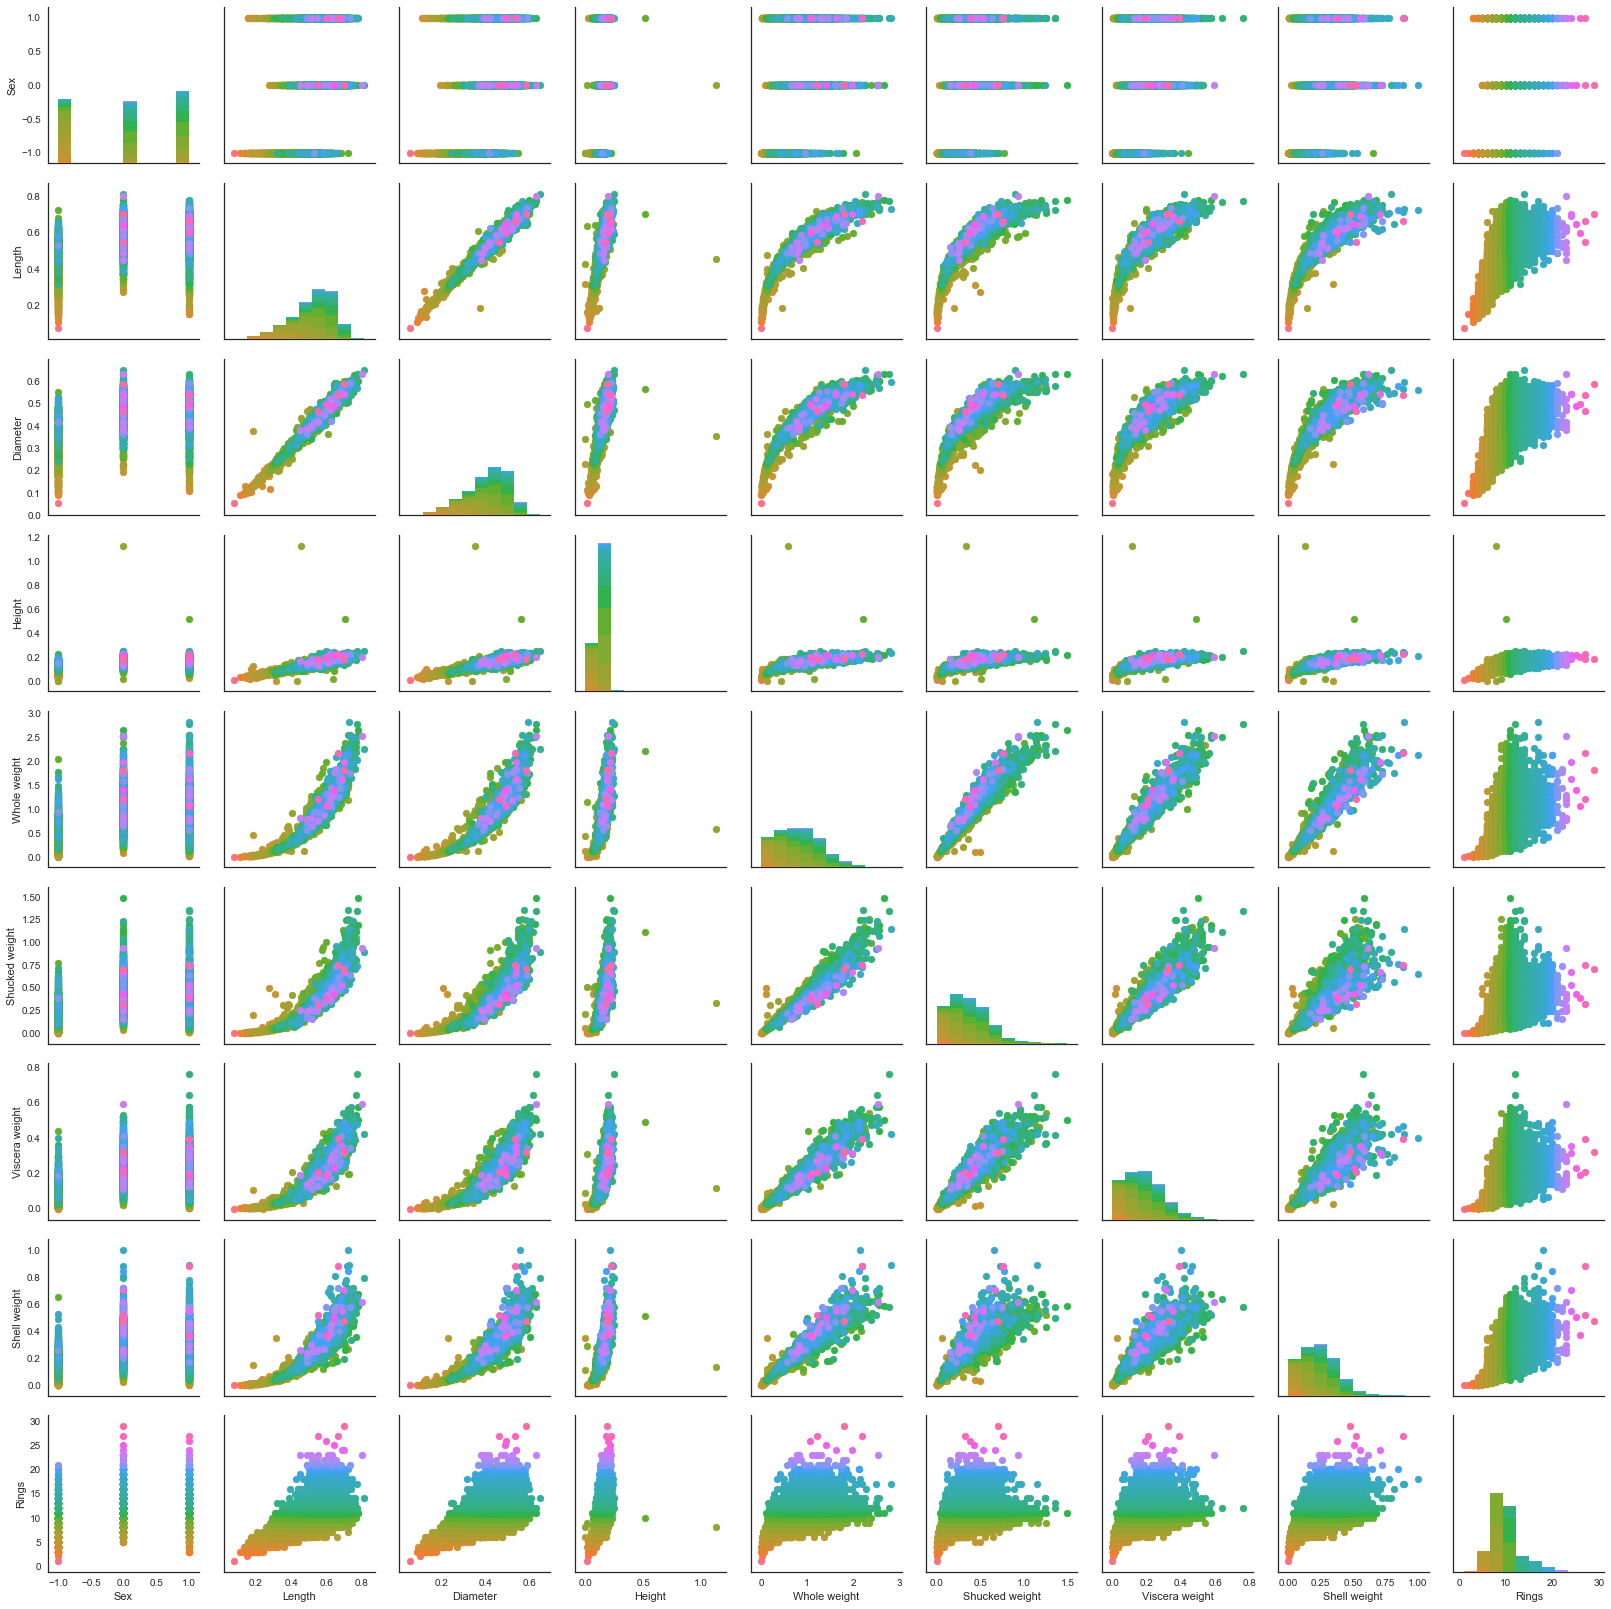

In [7]:
g = sns.PairGrid(data, hue='Rings')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

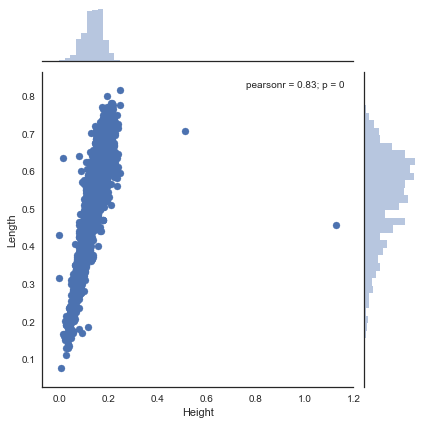

In [12]:
def draw_joinplot(col1, col2):
    g = sns.jointplot(x=col1, y=col2, data=data)
    
draw_joinplot(data['Height'], data['Length'])

## Pokemon dataset

In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon_summary = pokemon.describe().transpose()
pokemon_summary

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


### Drop legendary column

In [4]:
pokemon = pokemon.drop(['Legendary','#'],1)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


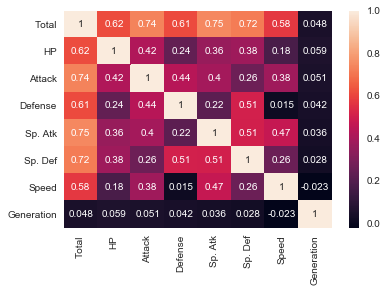

In [5]:
sns.heatmap(pokemon.corr(), annot=True)

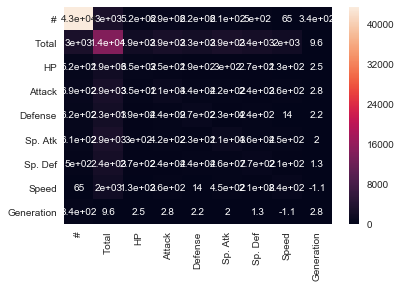

In [27]:
sns.heatmap(pokemon.cov(), annot=True)

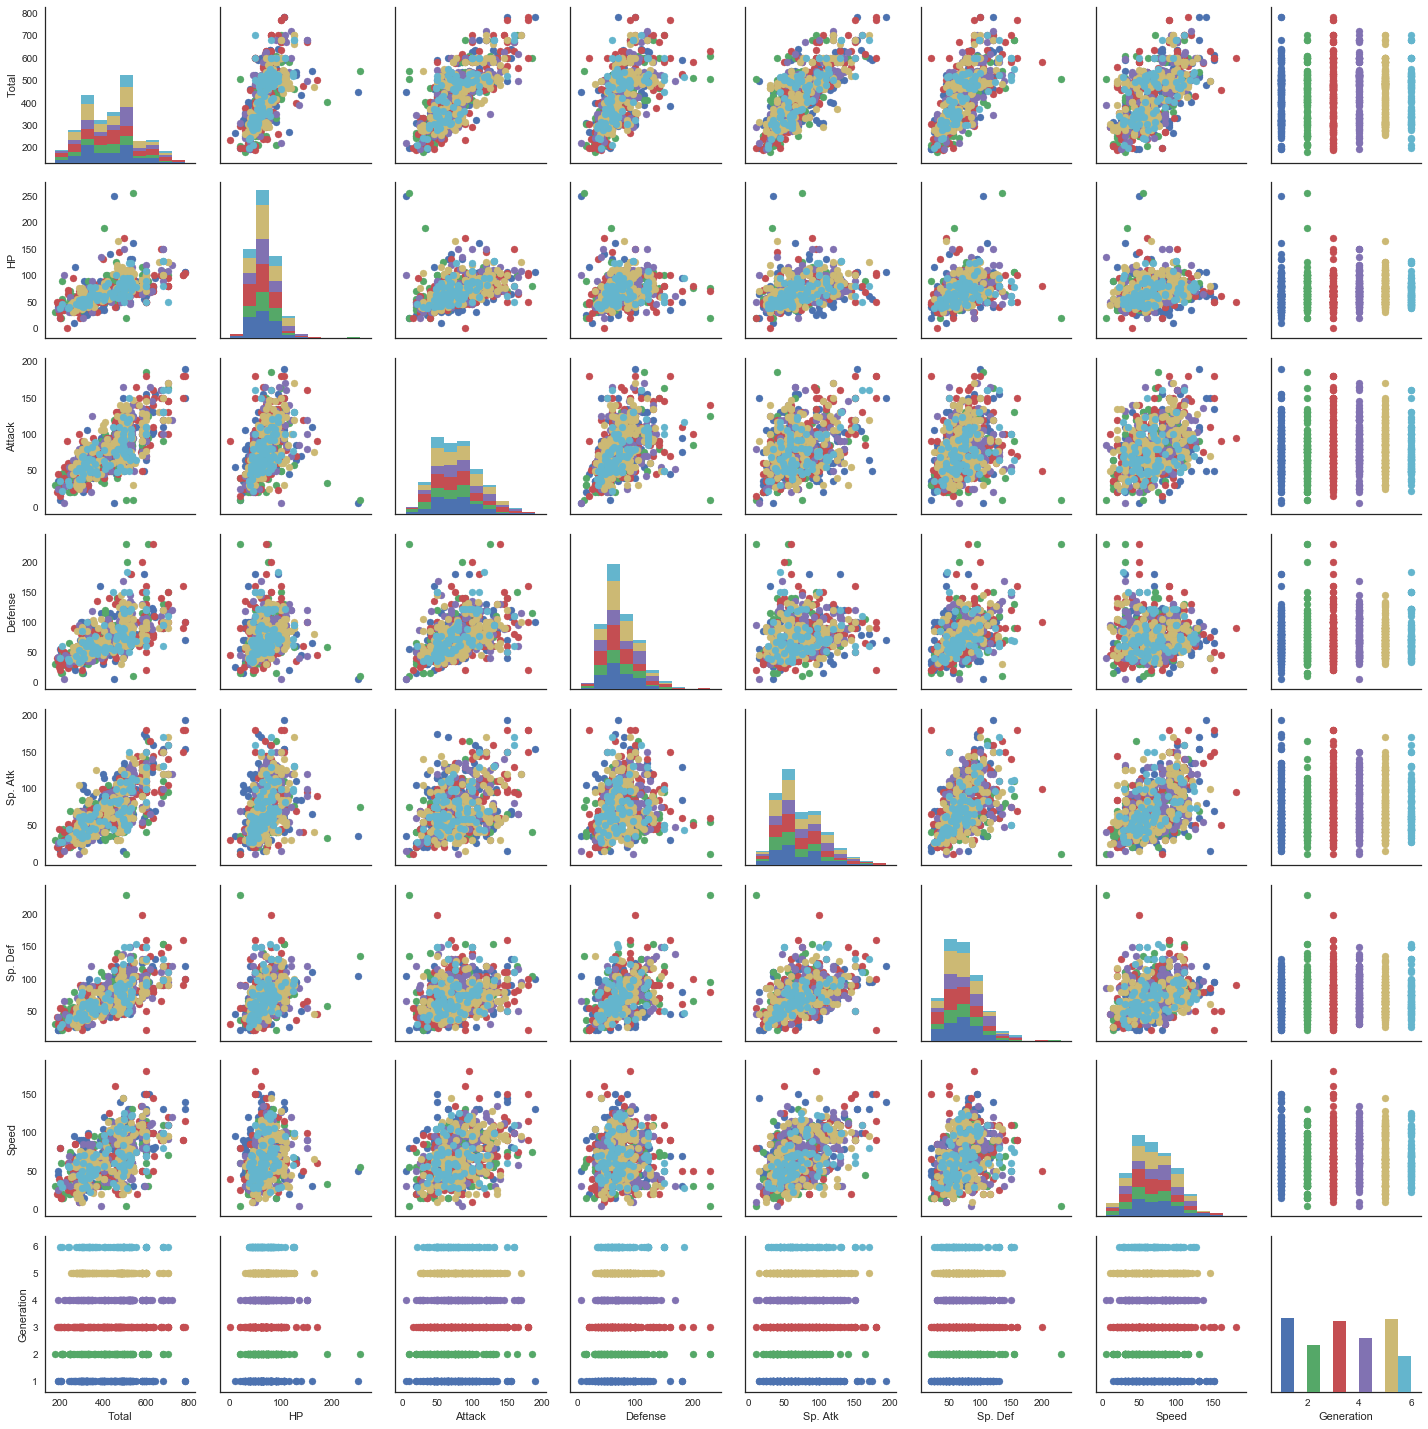

In [6]:
p = sns.PairGrid(pokemon, hue='Generation')
p = p.map_diag(plt.hist)
p = p.map_offdiag(plt.scatter)

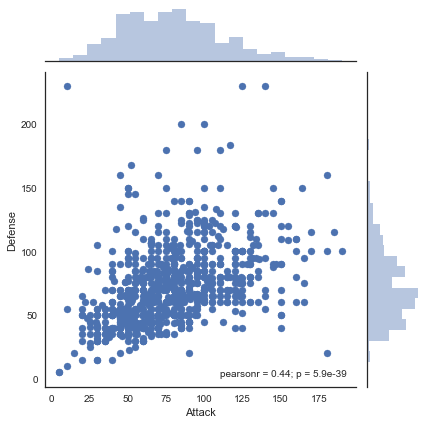

In [30]:
draw_joinplot(pokemon['Attack'], pokemon['Defense'])

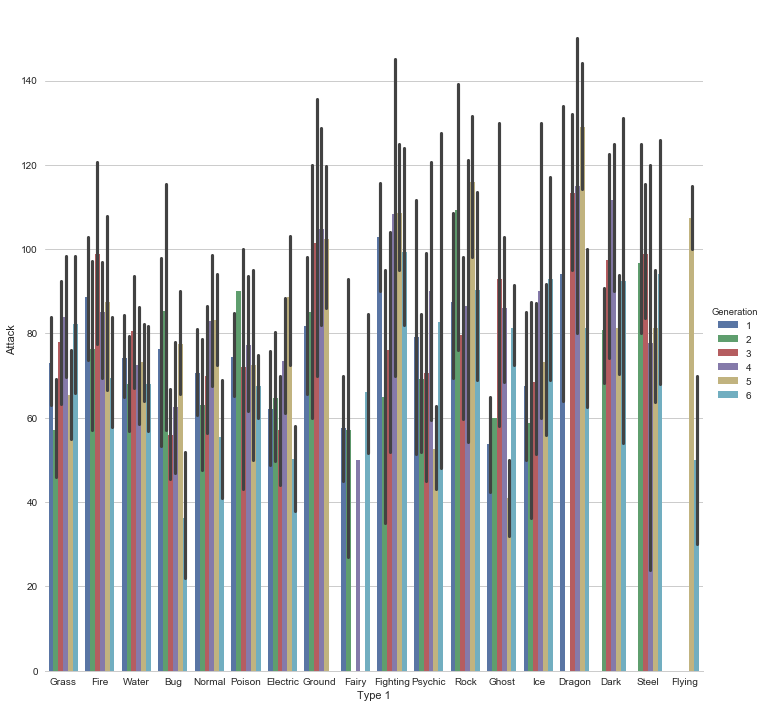

In [24]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Type 1", y="Attack", hue="Generation", size=10, data=pokemon, kind="bar")
g.despine(left=True)